In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
cn = '198Rn'
bf = 0.62
ch = 'xn'
sigr = 2.5
# bf_diff = 0.01

proj = '56Fe'
trg = '142Nd'

df10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')



In [10]:
# e_lab = [232, 248]
exp_data = [ [0, 2], [2, 0],]

In [11]:
dfm10_mb = df10_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10 = dfm10_mb
dfm0 = dfm0_mb
df10 = df10_mb
df0 = df0_mb

mb = 1
ub = 1e3
nb = 1e6
pb = 1e9

scale = nb

dfm10['CS'] = dfm10_mb['CS']*scale
dfm0['CS'] = dfm0_mb['CS']*scale
df10.iloc[:,2:] = df10_mb.iloc[:,2:] * scale
df0.iloc[:,2:] = df0_mb.iloc[:,2:] * scale

# try:
#     exp = exp * scale
# except NameError:
#     print('No exp. values')

/tmp/ipykernel_24574/101936048.py:14: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[8:10]))], palette=colors)
/tmp/ipykernel_24574/101936048.py:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df0.columns[8:10]))], palette=colors, ls=':', legend=False)


255.0


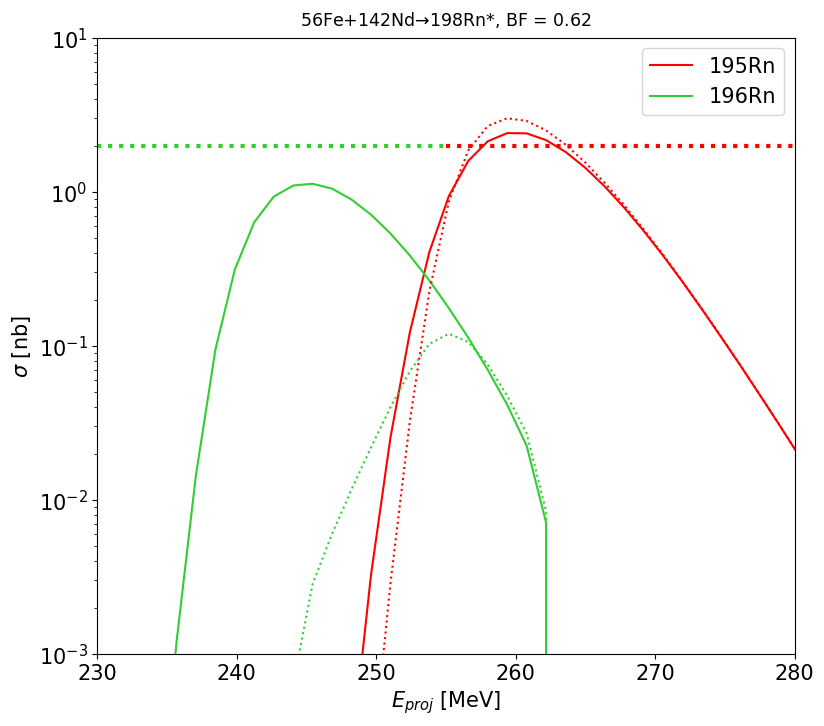

In [16]:
plt.rcParams.update({'font.size': 15})

colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta', 'grey', 'olive', 'brown']

# frame = 'E*/MeV'
frame = 'E_lab'
xmin = 230
xmax = 280
ymin = 1e-3
ymax = 1e1

fig, ax = plt.subplots(figsize=(9,8))

sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[8:10]))], palette=colors)
sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df0.columns[8:10]))], palette=colors, ls=':', legend=False)

plt.semilogy()
plt.ylim(ymin, ymax)
if frame == 'E_lab':
    plt.xlabel('$E_{proj}$ [MeV]')
    plt.xlim(xmin, xmax)
elif frame == 'E*/MeV':
    plt.xlabel('$E*$ [MeV]')
    plt.xlim(xmin, xmax)
# plt.suptitle('CN: ' + cn + '*, ' + proj + ' + ' + trg + ' vs. ' + proj_ritu + ' + ' + trg_ritu)# + '; BF = ' + str(bf) + ' $\pm$ ' + str(bf_diff) + ', sigr0 = ' + str(sigr))#, va='top')
# plt.title('BF = ' + str(bf) + ' $\pm$ ' + str(bf_diff) + ', sigr0 = ' + str(sigr) + ', V0 = 40 MeV', va='bottom', fontsize='small')
# plt.title('CN: ' + cn + '*, ' + proj + ' + ' + trg + '; BF = ' + str(bf) + ', sigr0 = ' + str(sigr) + ', V0 = 40MeV', va='bottom', fontsize='small')
plt.title(proj + '+' + trg + r'$\to$' + cn + '*' + ', BF = ' + str(bf), va='bottom', fontsize='small')
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
elif scale == pb:
    plt.ylabel('$\sigma$ [pb]')
plt.legend(loc='upper right')

plt.plot([xmin, xmin+(xmax-xmin)/2], [2, 2], color=colors[1], ls=':', linewidth=3)
plt.plot([xmin+(xmax-xmin)/2, xmax], [2, 2], color=colors[0], ls=':', linewidth=3)
    
print(xmin+(xmax-xmin)/2)
# exp_192at = 40*1e-6*scale
# exp_193at = 13*1e-6*scale
# exp_ritu = 300*1e-9*scale

# label_192at = '51V+144Sm->192At+3n SHIP'
# label_193at = '51V+144Sm->193At+2n SHIP'
# label_ritu = '54Fe+141Pr->191At+4n RITU'
# new_labels = [label_192at, label_193at, label_ritu]

# h, l = ax.get_legend_handles_labels()
# ax.legend(handles=h,labels=new_labels, loc='upper right')
        
# if frame == 'E*/MeV':
#     dfm_frame = 1
#     E_exp = 39
#     E_exp_ritu = 49
#     en_frame = 'Eexc'
# elif frame == 'E_lab':
#     dfm_frame = 0
#     E_exp = 230
#     E_exp_ritu = 260
#     en_frame = 'Elab'

# (_, caps_192at, _) = plt.errorbar(E_exp, exp_192at, yerr=exp_192at*0.25, marker='.', capsize=5, color=colors[0], ls='none', markersize=10)
# (_, caps_193at, _) = plt.errorbar(E_exp, exp_193at, yerr=exp_193at*0., marker='.', capsize=5, color=colors[1], ls='none', markersize=10)
# (_, caps_ritu, _) = plt.errorbar(E_exp_ritu, exp_ritu, yerr=0, marker='.', capsize=5, color=colors[2], ls='none', markersize=10)

# alpha_value = 0.1

# for i in range(plot_from, plot_from+2):
#     plt.fill_between(df10.iloc[:, dfm_frame],  df10.iloc[:, i], bf_low_10.iloc[:, i], color=colors[i-plot_from], alpha = alpha_value)
#     plt.fill_between(df10.iloc[:, dfm_frame],  df10.iloc[:, i], bf_high_10.iloc[:, i], color=colors[i-plot_from], alpha = alpha_value)
#     # plt.fill_between(df0.iloc[:, 0],  df0.iloc[:, i], bf_low_0.iloc[:, i], color=colors[i-plot_from], alpha = alpha_value)
#     # plt.fill_between(df0.iloc[:, 0],  df0.iloc[:, i], bf_high_0.iloc[:, i], color=colors[i-plot_from], alpha = alpha_value)
    
# for i in range(plot_from_ritu, plot_from_ritu+1):
#     plt.fill_between(df10_ritu.iloc[:, dfm_frame],  df10_ritu.iloc[:, i], bf_low_10_ritu.iloc[:, i], color=colors[2], alpha = alpha_value)
#     plt.fill_between(df10_ritu.iloc[:, dfm_frame],  df10_ritu.iloc[:, i], bf_high_10_ritu.iloc[:, i], color=colors[2], alpha = alpha_value)
    
# for cap in caps_192at:
#     cap.set_markeredgewidth(1)
# for cap in caps_193at:
#     cap.set_markeredgewidth(1)
# for cap in caps_ritu:
#     cap.set_markeredgewidth(1)

# plt.show()

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.png', bbox_inches='tight')
plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.pdf', bbox_inches='tight')